In [ ]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/content/Modified_Data_for_Analysis.xlsx')

open_ended_columns = ['Price_Justification', 'Overall_Impression']
wtp_columns = ['Accommodation_Budget', 'Airbnb_Review_WTP']

rational_words = {
    "Cleanliness": ["clean", "cleanliness", "hygiene", "sanitary"],
    "Convenience": ["convenience", "convenient", "accessible", "ease", "easy", "location", "budgets", "prices", "fees", "property", "budget", "wifi", "equipped", "afford", "reliable", "maintained"],
    "Amenities": ["amenities", "facility", "facilities", "jacuzzi", "pool", "gym", "kitchen", "aldo"]
}

emotional_words = {
    "Comfort": ["comfort", "comfortable", "cozy", "relaxing", "spacious", "leisure", "feel", "nice", "consistent", "positive", "service", "experience", "confort", "quality", "impression", "care", "modern"]
}

rational_word_list = [word for sublist in rational_words.values() for word in sublist]
emotional_word_list = [word for sublist in emotional_words.values() for word in sublist]

# Function to clean and tokenize text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()

In [ ]:
total_rational_words = 0
total_emotional_words = 0
word_frequencies = Counter()

# Add columns for word counts in each review
data['Rational_Word_Count'] = 0
data['Emotional_Word_Count'] = 0

# Process each review to count word occurrences and categorize
for index, row in data.iterrows():
    rational_count = 0
    emotional_count = 0

    for col in open_ended_columns:
        if pd.notnull(row[col]):
            words = clean_text(row[col])
            for word in words:
                word_frequencies[word] += 1  # Count the word in overall frequencies

                # Check if the word belongs to rational or emotional categories
                if word in rational_word_list:
                    rational_count += 1
                elif word in emotional_word_list:
                    emotional_count += 1

    # Update the row with rational and emotional word counts
    data.at[index, 'Rational_Word_Count'] = rational_count
    data.at[index, 'Emotional_Word_Count'] = emotional_count

    # Update total rational and emotional word counts across all reviews
    total_rational_words += rational_count
    total_emotional_words += emotional_count

In [ ]:
#Create Word Frequency Table
word_df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
word_df['Category'] = word_df['Word'].apply(
    lambda x: 'Rational' if x in rational_word_list else 'Emotional' if x in emotional_word_list else 'Neutral'
)

word_df = word_df[word_df['Category'] != 'Neutral'].sort_values(by='Frequency', ascending=False)


In [ ]:
# Total Rational and Emotional Word Count
print(f"Total Rational Words Across All Reviews: {total_rational_words}")
print(f"Total Emotional Words Across All Reviews: {total_emotional_words}")


Total Rational Words Across All Reviews: 79
Total Emotional Words Across All Reviews: 52


In [ ]:
# Count of Rational Words in Emotional Reviews and Emotional Words in Rational Reviews
rational_in_emotional_reviews = data[(data['Rational_Review'] == 0) & (data['Rational_Word_Count'] > 0)]['Rational_Word_Count'].sum()
emotional_in_rational_reviews = data[(data['Rational_Review'] == 1) & (data['Emotional_Word_Count'] > 0)]['Emotional_Word_Count'].sum()

print(f"Rational Words in Emotional Reviews: {rational_in_emotional_reviews}")
print(f"Emotional Words in Rational Reviews: {emotional_in_rational_reviews}")


Rational Words in Emotional Reviews: 38
Emotional Words in Rational Reviews: 19



Average WTP Increase for Predominantly Rational Comments: 32.965185185185184
Average WTP Increase for Predominantly Emotional Comments: 24.913333333333327


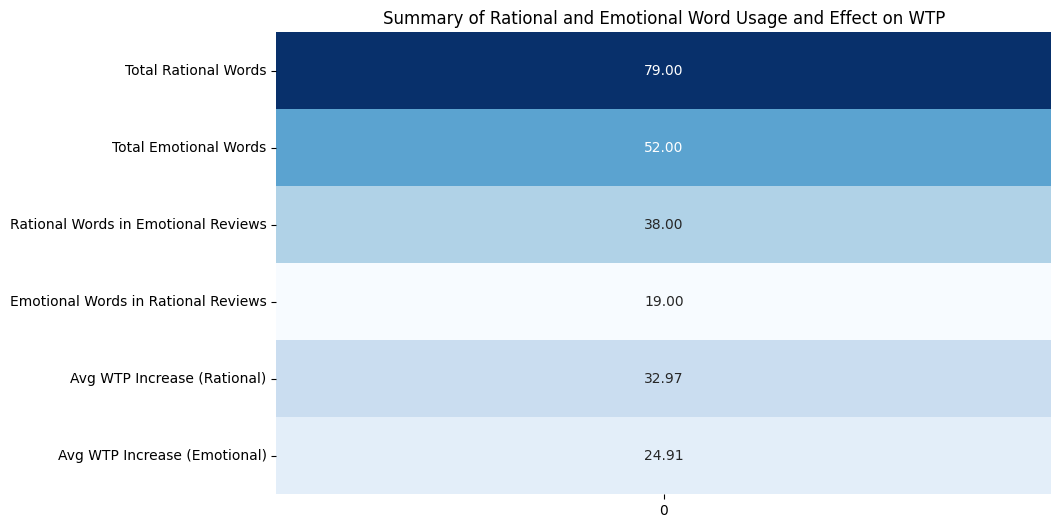

In [ ]:
#  Effect on WTP for Rational and Emotional Word Usage
data['WTP_Change'] = data['Airbnb_Review_WTP'] - data['Accommodation_Budget']
rational_wtp = data[data['Rational_Word_Count'] > data['Emotional_Word_Count']]['WTP_Change'].mean()
emotional_wtp = data[data['Emotional_Word_Count'] > data['Rational_Word_Count']]['WTP_Change'].mean()

print(f"\nAverage WTP Increase for Predominantly Rational Comments: {rational_wtp}")
print(f"Average WTP Increase for Predominantly Emotional Comments: {emotional_wtp}")

# Display Summary Table using Seaborn Heatmap for Visualization
summary_table = pd.DataFrame({
    "Total Rational Words": [total_rational_words],
    "Total Emotional Words": [total_emotional_words],
    "Rational Words in Emotional Reviews": [rational_in_emotional_reviews],
    "Emotional Words in Rational Reviews": [emotional_in_rational_reviews],
    "Avg WTP Increase (Rational)": [rational_wtp],
    "Avg WTP Increase (Emotional)": [emotional_wtp]
})

plt.figure(figsize=(10, 6))
sns.heatmap(summary_table.T, annot=True, cmap='Blues', cbar=False, fmt=".2f")
plt.title("Summary of Rational and Emotional Word Usage and Effect on WTP")
plt.show()


Average Likelihood to Choose for Predominantly Rational Comments: 72.07407407407408
Average Likelihood to Choose for Predominantly Emotional Comments: 82.14285714285714


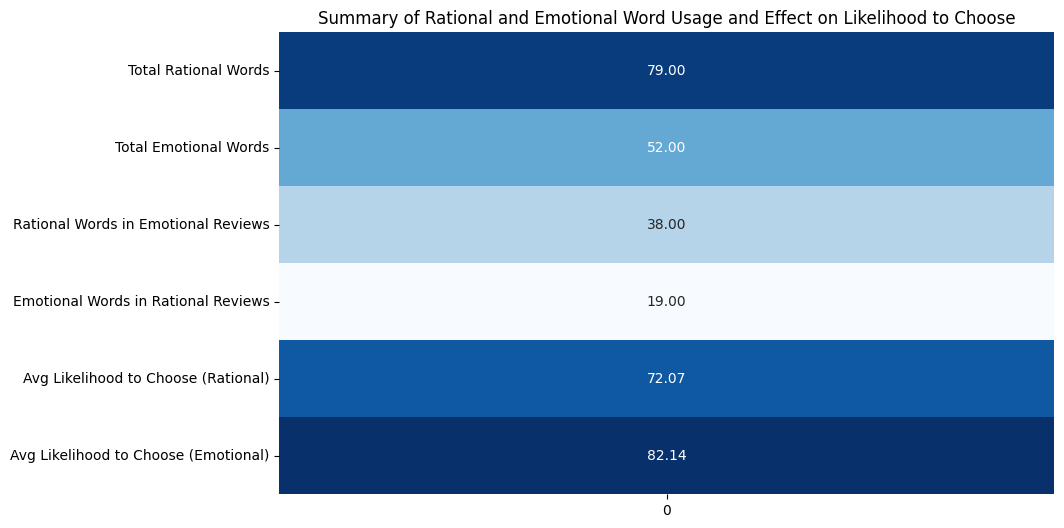

In [ ]:
#Effect on Likelihood to Choose for Rational and Emotional Word Usage
rational_likelihood = data[data['Rational_Word_Count'] > data['Emotional_Word_Count']]['Likelihood_to_Choose'].mean()
emotional_likelihood = data[data['Emotional_Word_Count'] > data['Rational_Word_Count']]['Likelihood_to_Choose'].mean()

print(f"\nAverage Likelihood to Choose for Predominantly Rational Comments: {rational_likelihood}")
print(f"Average Likelihood to Choose for Predominantly Emotional Comments: {emotional_likelihood}")

# Display Summary Table using Seaborn Heatmap for Visualization
summary_table = pd.DataFrame({
    "Total Rational Words": [total_rational_words],
    "Total Emotional Words": [total_emotional_words],
    "Rational Words in Emotional Reviews": [rational_in_emotional_reviews],
    "Emotional Words in Rational Reviews": [emotional_in_rational_reviews],
    "Avg Likelihood to Choose (Rational)": [rational_likelihood],
    "Avg Likelihood to Choose (Emotional)": [emotional_likelihood]
})

plt.figure(figsize=(10, 6))
sns.heatmap(summary_table.T, annot=True, cmap='Blues', cbar=False, fmt=".2f")
plt.title("Summary of Rational and Emotional Word Usage and Effect on Likelihood to Choose")
plt.show()


In [ ]:
#(continued): Display detailed word frequency table
print("\nDetailed Word Frequencies:")
print(word_df)


Detailed Word Frequencies:
            Word  Frequency   Category
142       budget         14   Rational
69      property         14   Rational
28      location         11   Rational
60          nice         10  Emotional
166        clean          7   Rational
346   experience          6  Emotional
105     positive          6  Emotional
336   impression          5  Emotional
171   convenient          4   Rational
26   cleanliness          4   Rational
64     amenities          3   Rational
63   convenience          3   Rational
62       service          3  Emotional
165      leisure          3  Emotional
169       afford          3   Rational
185         feel          3  Emotional
274         cozy          2  Emotional
520      quality          2  Emotional
459      confort          2  Emotional
455  comfortable          2  Emotional
394   maintained          2   Rational
363         care          2  Emotional
7        budgets          2   Rational
170     reliable          2   Ration

<ipython-input-33-32c30d441f72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Dominant_Word_Type', y='WTP_Change', palette='coolwarm')


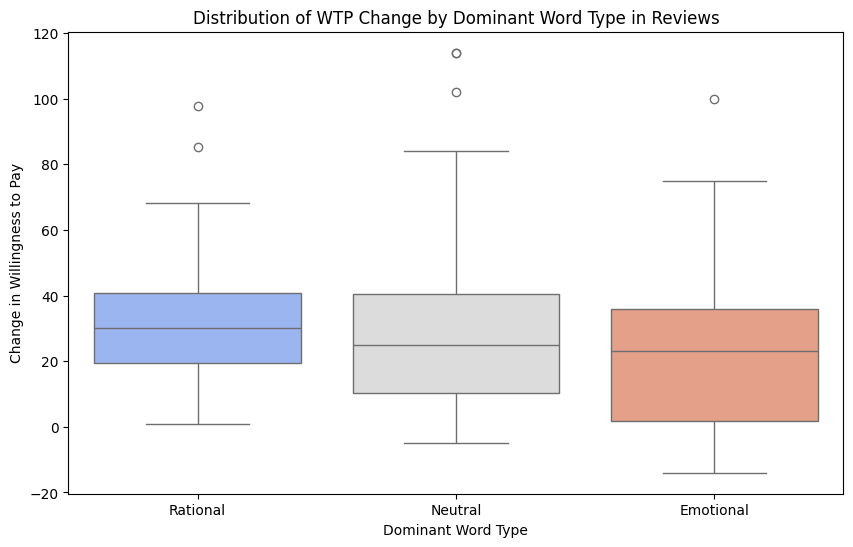

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a new column for dominant word type based on word counts
data['Dominant_Word_Type'] = data.apply(
    lambda row: 'Rational' if row['Rational_Word_Count'] > row['Emotional_Word_Count'] else
                ('Emotional' if row['Emotional_Word_Count'] > row['Rational_Word_Count'] else 'Neutral'),
    axis=1
)

# Plot WTP Change distribution by Dominant Word Type using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Dominant_Word_Type', y='WTP_Change', palette='coolwarm')
plt.title("Distribution of WTP Change by Dominant Word Type in Reviews")
plt.xlabel("Dominant Word Type")
plt.ylabel("Change in Willingness to Pay")
plt.show()


<ipython-input-10-0fab405c0c73>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Dominant_Word_Type', y='Likelihood_to_Choose', palette='coolwarm')


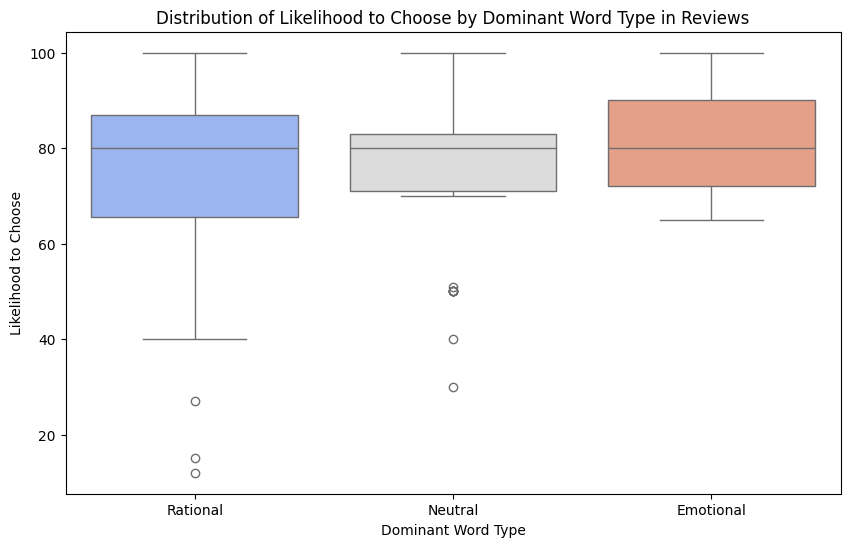

In [ ]:

# Create a new column for dominant word type based on word counts
data['Dominant_Word_Type'] = data.apply(
    lambda row: 'Rational' if row['Rational_Word_Count'] > row['Emotional_Word_Count'] else
                ('Emotional' if row['Emotional_Word_Count'] > row['Rational_Word_Count'] else 'Neutral'),
    axis=1
)

# Plot Likelihood to Choose distribution by Dominant Word Type using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Dominant_Word_Type', y='Likelihood_to_Choose', palette='coolwarm')
plt.title("Distribution of Likelihood to Choose by Dominant Word Type in Reviews")
plt.xlabel("Dominant Word Type")
plt.ylabel("Likelihood to Choose")
plt.show()


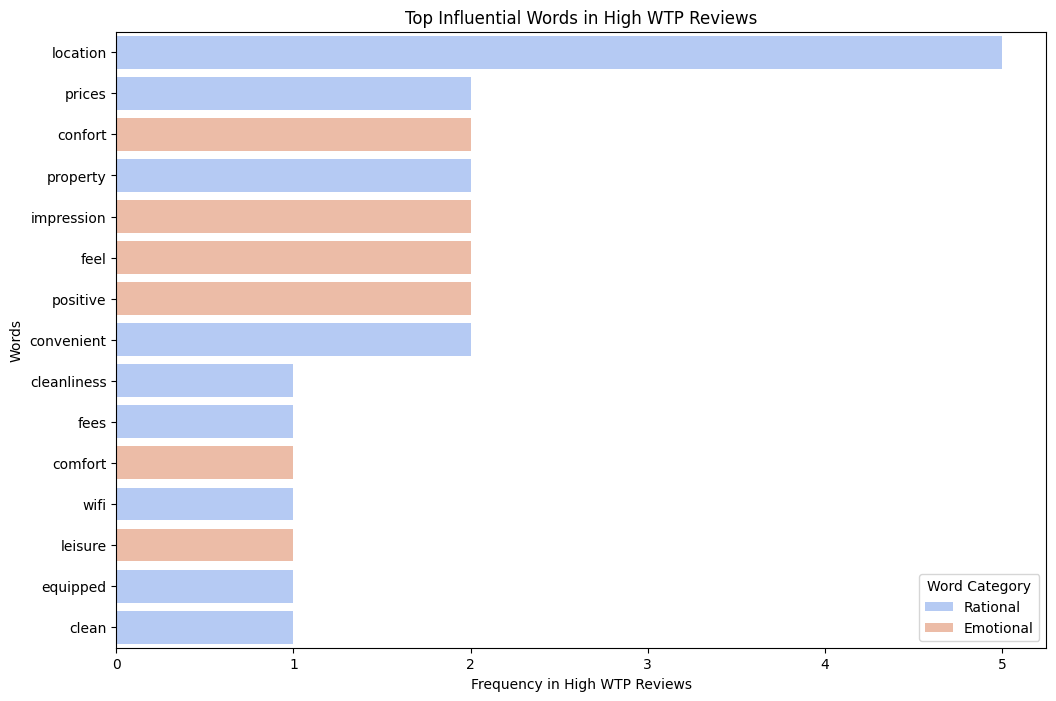

In [ ]:
import matplotlib.pyplot as plt

# Set threshold for "high" WTP change (e.g., top 25% of WTP changes)
high_wtp_threshold = data['WTP_Change'].quantile(0.75)
high_wtp_reviews = data[data['WTP_Change'] >= high_wtp_threshold]

# Count rational and emotional words in high WTP reviews
high_wtp_word_frequencies = Counter()
for col in open_ended_columns:
    high_wtp_reviews[col].dropna().apply(lambda text: high_wtp_word_frequencies.update(clean_text(text)))

# Filter for rational and emotional words only and create a DataFrame
influential_words = pd.DataFrame(
    [(word, freq, 'Rational' if word in rational_word_list else 'Emotional')
     for word, freq in high_wtp_word_frequencies.items() if word in rational_word_list or word in emotional_word_list],
    columns=['Word', 'Frequency', 'Category']
).sort_values(by='Frequency', ascending=False)

# Plot the top 15 most influential words by frequency
plt.figure(figsize=(12, 8))
sns.barplot(data=influential_words.head(15), x='Frequency', y='Word', hue='Category', dodge=False, palette='coolwarm')
plt.title("Top Influential Words in High WTP Reviews")
plt.xlabel("Frequency in High WTP Reviews")
plt.ylabel("Words")
plt.legend(title="Word Category")
plt.show()



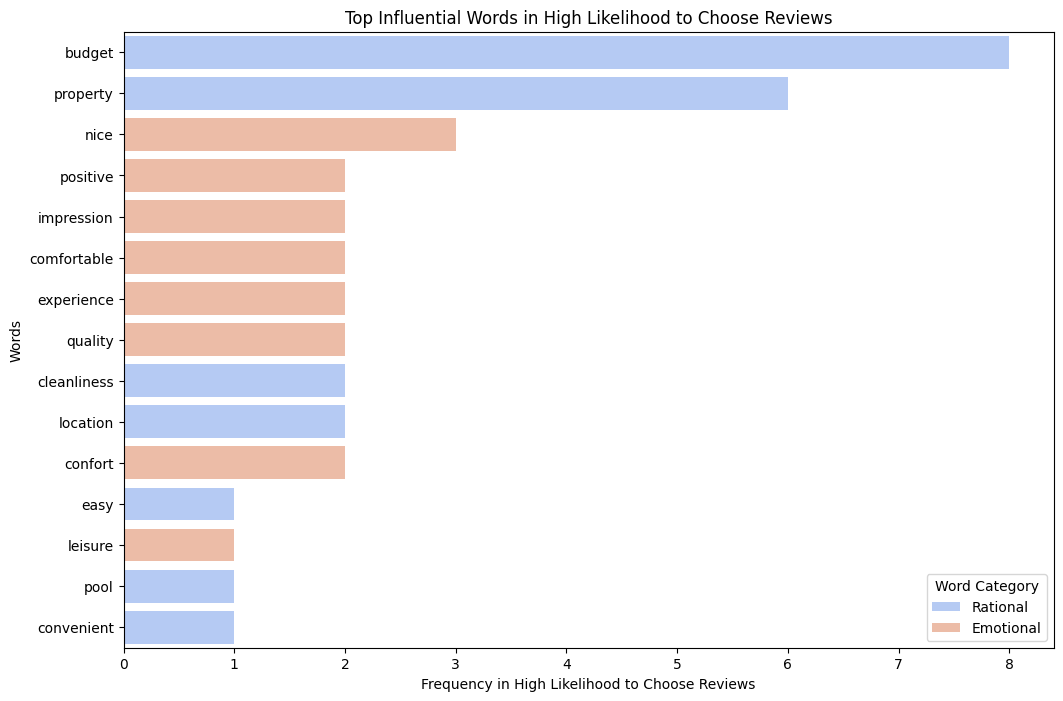

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set threshold for "high" Likelihood to Choose (e.g., top 25% of Likelihood to Choose scores)
high_likelihood_threshold = data['Likelihood_to_Choose'].quantile(0.75)
high_likelihood_reviews = data[data['Likelihood_to_Choose'] >= high_likelihood_threshold]

# Count rational and emotional words in high Likelihood to Choose reviews
high_likelihood_word_frequencies = Counter()
for col in open_ended_columns:
    high_likelihood_reviews[col].dropna().apply(lambda text: high_likelihood_word_frequencies.update(clean_text(text)))

# Filter for rational and emotional words only and create a DataFrame
influential_words = pd.DataFrame(
    [(word, freq, 'Rational' if word in rational_word_list else 'Emotional')
     for word, freq in high_likelihood_word_frequencies.items() if word in rational_word_list or word in emotional_word_list],
    columns=['Word', 'Frequency', 'Category']
).sort_values(by='Frequency', ascending=False)

# Plot the top 15 most influential words by frequency
plt.figure(figsize=(12, 8))
sns.barplot(data=influential_words.head(15), x='Frequency', y='Word', hue='Category', dodge=False, palette='coolwarm')
plt.title("Top Influential Words in High Likelihood to Choose Reviews")
plt.xlabel("Frequency in High Likelihood to Choose Reviews")
plt.ylabel("Words")
plt.legend(title="Word Category")
plt.show()
